In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Memuat ekstensi untuk auto-reload modul eksternal
%load_ext autoreload
%autoreload 2

import os

In [2]:
# Impor semua komponen yang dibutuhkan dari file delivery.py
from delivery_tsp_solver import DeliveryEnvironment, DeliveryQAgent, run_training_with_visualization

In [3]:
# =================================================================
# PARAMETER EKSPERIMEN
# =================================================================
N_STOPS = 500               # Jumlah kota/titik pengiriman
N_EPISODES = 1000         # Jumlah episode pelatihan (semakin banyak semakin baik)

In [4]:
OUTPUT_FOLDER = "hasil_eksperimen"
PLOT_FILENAME = os.path.join(OUTPUT_FOLDER, f"grafik_reward_{N_STOPS}_titik_pelatihan.png")

In [5]:
# BARU: Buat folder output jika belum ada
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"Semua hasil akan disimpan di folder: '{OUTPUT_FOLDER}/'")

Semua hasil akan disimpan di folder: 'hasil_eksperimen/'


In [6]:
env = DeliveryEnvironment(n_stops = N_STOPS)

Initialized Delivery Environment with 500 random stops.
Target metric for optimization is distance.


Setup selesai.

Peta Awal Titik Pengiriman:


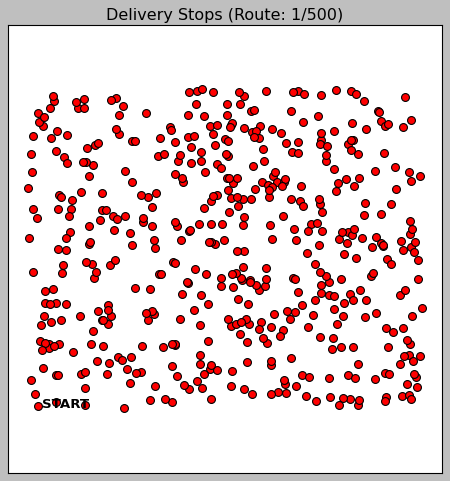

In [7]:
# Inisialisasi agen
agent = DeliveryQAgent(
    states_size=env.observation_space,
    actions_size=env.action_space,
)
print("Setup selesai.\n")
# Tampilkan peta awal
print("Peta Awal Titik Pengiriman:")
env.render()


In [8]:
# =================================================================
# 2. JALANKAN PELATIHAN & BUAT VISUALISASI
# =================================================================
print("\n--- TAHAP 2: Memulai Fase Pelatihan dan Pembuatan Visualisasi ---")
trained_agent, training_time,rewards_history = run_training_with_visualization(
    env, 
    agent, 
    n_episodes=N_EPISODES,
    gif_filename=f"training_{N_STOPS}_modif_stops.gif",
)
print("Fase pelatihan selesai.\n")



--- TAHAP 2: Memulai Fase Pelatihan dan Pembuatan Visualisasi ---
Memulai pelatihan untuk 1000 episode...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.39it/s]



Pelatihan selesai dalam 28.2622 detik.
Menyimpan visualisasi pelatihan sebagai 'training_500_modif_stops.gif'...
Visualisasi berhasil disimpan.
Fase pelatihan selesai.




--- TAHAP 2.5: Menampilkan Grafik Pembelajaran Agen ---
Grafik pembelajaran berhasil disimpan sebagai 'hasil_eksperimen/grafik_reward_500_titik_pelatihan.png'


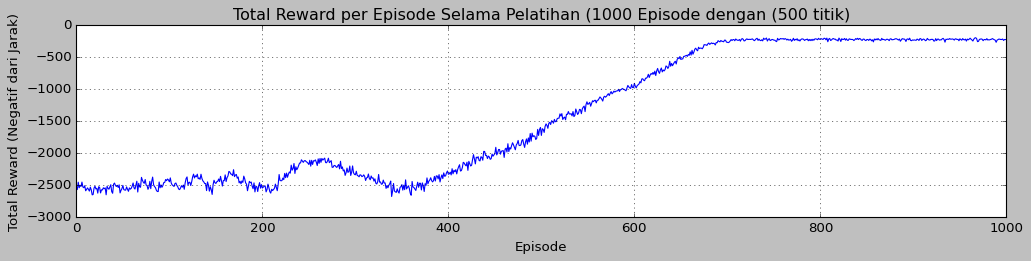

In [9]:
# =================================================================
# BARU: TAHAP 2.5 - PLOT GRAFIK PEMBELAJARAN
# =================================================================
print("\n--- TAHAP 2.5: Menampilkan Grafik Pembelajaran Agen ---")
# Plot reward
plt.figure(figsize=(15,3))
plt.title(f'Total Reward per Episode Selama Pelatihan ({N_EPISODES} Episode dengan ({N_STOPS} titik)')
plt.xlabel('Episode')
plt.ylabel('Total Reward (Negatif dari Jarak)')
plt.grid(True)
plt.plot(rewards_history)
plt.savefig(PLOT_FILENAME, dpi=300, bbox_inches='tight') 
print(f"Grafik pembelajaran berhasil disimpan sebagai '{PLOT_FILENAME}'")
plt.show()

In [10]:
# =================================================================
# 3. CARI RUTE OPTIMAL DAN UKUR WAKTU INFERENSI
# =================================================================
print("\n--- TAHAP 3: Memulai Fase Inferensi untuk Pengukuran Waktu Komputasi ---")
best_route, shortest_distance, inference_time = trained_agent.find_optimal_route(env)
print("Fase inferensi selesai.")


--- TAHAP 3: Memulai Fase Inferensi untuk Pengukuran Waktu Komputasi ---
Fase inferensi selesai.



       HASIL AKHIR EKSPERIMEN PENELITIAN
Jumlah Titik                : 500
Jumlah Episode Pelatihan    : 1000
--------------------------------------------------
Total Waktu Pelatihan       : 28.262249 detik
Waktu Komputasi (Inference) : 0.016796 detik  <-- (BANDINGKAN NILAI INI)
--------------------------------------------------
Rute Terpendek Ditemukan    : 123 → 171 → 215 → 269 → 49 → 167 → 415 → 359 → 62 → 198 → 124 → 425 → 217 → 260 → 496 → 264 → 125 → 353 → 176 → 230 → 314 → 205 → 202 → 351 → 383 → 166 → 30 → 291 → 344 → 315 → 319 → 278 → 93 → 237 → 343 → 414 → 266 → 141 → 115 → 379 → 20 → 352 → 322 → 450 → 92 → 382 → 495 → 449 → 309 → 63 → 193 → 179 → 40 → 150 → 38 → 452 → 267 → 482 → 161 → 112 → 371 → 90 → 245 → 226 → 72 → 411 → 108 → 110 → 190 → 261 → 107 → 89 → 297 → 479 → 80 → 235 → 192 → 257 → 211 → 422 → 239 → 9 → 305 → 36 → 35 → 368 → 233 → 250 → 302 → 300 → 26 → 33 → 483 → 327 → 394 → 377 → 149 → 74 → 224 → 138 → 53 → 487 → 436 → 236 → 466 → 470 → 312 → 242 → 463 → 58 → 

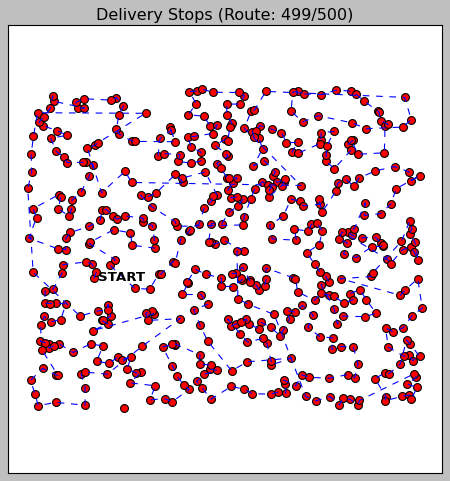

In [11]:
# =================================================================
# 4. TAMPILKAN HASIL AKHIR PENELITIAN
# =================================================================
print("\n" + "="*50)
print("       HASIL AKHIR EKSPERIMEN PENELITIAN")
print("="*50)
print(f"Jumlah Titik                : {N_STOPS}")
print(f"Jumlah Episode Pelatihan    : {N_EPISODES}")
print("-" * 50)
print(f"Total Waktu Pelatihan       : {training_time:.6f} detik")
print(f"Waktu Komputasi (Inference) : {inference_time:.6f} detik  <-- (BANDINGKAN NILAI INI)")
print("-" * 50)
print("Rute Terpendek Ditemukan    :", " → ".join(map(str, best_route)))
print(f"Jarak Terpendek             : {shortest_distance:.4f}")
print("="*50)

# =================================================================
# 5. VISUALISASI RUTE TERBAIK
# =================================================================
print("\nVisualisasi rute terpendek yang ditemukan:")
env.stops = best_route
env.render()